In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_excel (r'input/376.xlsx',header=[3])
df.head()

/Users/dannymorton/Desktop/vis/.venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Transaction Date,Transaction Type,Reference Number,Customer Vendor #,Customer/Vendor Name,Receiving PO Number,Inventory Quantity,Non-Inventory Quantity,Price,Cost,Inventory Balance,Transaction Date.1,Transaction Type.1,Reference Number.1,Created By,Created Date,Created Time,Last Changed By,Last Changed Date,Last Changed Time
0,2023-05-08,INVC,3.760041e+09,2852610.0,GEORGE E. FERN COMPANY,NaN,0.0,1.0,45.0,37.5,0.0,2023-05-08,INVC,3.760041e+09,U651RLW,2023-05-08,14:59:54,U651RLW,2023-05-08,14:59:54
1,2023-05-08,INVC,3.760041e+09,2851944.0,"DAVIS H. ELLIOT CO., INC.",NaN,0.0,4.0,45.0,37.5,0.0,2023-05-08,INVC,3.760041e+09,U651KAW,2023-05-08,13:56:48,U651KAW,2023-05-08,13:56:48
2,2023-05-08,INVC,3.760041e+09,2851944.0,"DAVIS H. ELLIOT CO., INC.",NaN,0.0,2.0,45.0,37.5,0.0,2023-05-08,INVC,3.760041e+09,U651KAW,2023-05-08,13:56:48,U651KAW,2023-05-08,13:56:48
3,2023-05-08,INVC,3.760041e+09,2851944.0,"DAVIS H. ELLIOT CO., INC.",NaN,0.0,0.0,45.0,37.5,0.0,2023-05-08,INVC,3.760041e+09,U651KAW,2023-05-08,13:54:43,U651KAW,2023-05-08,13:56:48
4,2023-05-08,INVC,3.760041e+09,2857787.0,COBB TRUCKING,NaN,0.0,1.5,45.0,37.5,0.0,2023-05-08,INVC,3.760041e+09,U651KAW,2023-05-08,13:46:58,U651KAW,2023-05-08,13:46:58


In [5]:
df.columns.to_list()

['Transaction Date',
 'Transaction Type',
 'Reference Number',
 'Customer Vendor #',
 'Customer/Vendor Name',
 'Receiving PO Number',
 'Inventory Quantity',
 'Non-Inventory Quantity',
 'Price',
 'Cost',
 'Inventory Balance',
 'Transaction Date.1',
 'Transaction Type.1',
 'Reference Number.1',
 'Created By',
 'Created Date',
 'Created Time',
 'Last Changed By',
 'Last Changed Date',
 'Last Changed Time']

Defined function to clean all the imported data 

In [390]:
def process_data(df):
    df.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
    df.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
    df = df[df.Customer != "TRANSFERS TO #372 J'VILLE"]
    df = df[df.Customer != "TRANSFERS TO #374 SEYMOUR"]
    df = df[df.Customer != "TRANSFERS TO #373 E-TOWN"]
    df = df[df.Customer != "TRANSFERS TO #375 S'VILLE"]
    df = df[df.Customer != "*** STORE TRANSFERS ***"]
    df = df[df.Customer != "Beginning Balance"]
    df = df[df.Customer != 'Net Activity']
    df = df[df.Customer != 'Ending Balance']
    df = df[df.Customer != 'VOID']
    df = df[df.Customer != "TRANSFERS TO #376 L'VILLE"]
    df = df.dropna(how="all")
    Gross = df.Qty * df.Price
    df['Gross'] = Gross.where(df.Price == 'Qty', other=Gross)
    Net = df.Qty * df.Cost 
    df['Net'] = Net.where(df.Cost == 'Qty', other=Net)
    Net = df.Gross - df.Net 
    df['Net'] = Net.where(df.Gross == "Net", other=Net)
    return df


Running the process_data function to clean the raw store data.

In [391]:
df0 = pd.read_excel (r'input/370.xlsx',header=[3])
df0 = process_data(df0)

df1 = pd.read_excel (r'input/372.xlsx',header=[3])
df1 = process_data(df1)

df2 = pd.read_excel (r'input/373.xlsx',header=[3])
df2 = process_data(df2)

df3 = pd.read_excel (r'input/374.xlsx',header=[3])
df3 = process_data(df3)

df4 = pd.read_excel (r'input/375.xlsx',header=[3])
df4 = process_data(df4)

df5 = pd.read_excel (r'input/376.xlsx',header=[3])
df5 = process_data(df5)

/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/dannymorton714/.local/lib/python3.9/site-packages/

This is a set of dictionaries of gross and net profits per store. This will be used in the graphing portions below.  

In [392]:
Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}
Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}

Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}

Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}

Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}


Defined function to do qty count to determine top customers by line items. 

In [393]:
def top_customers(df):
    agg_functions = {'Customer': 'first', 'Qty': 'sum'}
    df_customer = df.groupby(df['Customer']).aggregate(agg_functions)
    df_customer = df_customer.sort_values(['Qty'],ascending=False)
    df_customer = pd.DataFrame(df_customer)
    return df_customer

This runs the top_customers function and saves a CSV to the output folder.

In [394]:
df0_customer = df0
df0_customer = top_customers(df0)
# print(df0_customer)
df0_customer.to_csv(r'output/customer_by_qty/370_customers_qty.csv', index=False)
# df0_customer.plot.bar()

df1_customer = df1
df1_customer = top_customers(df1)
# print(df1_customer)
df1_customer.to_csv(r'output/customer_by_qty/372_customers_qty.csv', index=False)


df2_customer = df2
df2_customer = top_customers(df2)
# df2_customer 
df2_customer.to_csv(r'output/customer_by_qty/373_customers_qty.csv', index=False)


df3_customer = df3
df3_customer = top_customers(df3)
# df3_customer
df3_customer.to_csv(r'output/customer_by_qty/374_customers_qty.csv', index=False)

df4_customer = df4
df4_customer = top_customers(df4)
# df4_customer
df4_customer.to_csv(r'output/customer_by_qty/375_customers_qty.csv', index=False)

df5_customer = df5
df5_customer = top_customers(df5)
# df5_customer
df5_customer.to_csv(r'output/customer_by_qty/376_customers_qty.csv', index=False)


Function to calculate sales by month. This converts the dates to a datetime format then aggrigates and groups the data for graphing.

In [395]:
def graph(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%m')
    # #define how to aggregate various fields
    agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}
    # #create new DataFrame by combining rows with same id values
    df = df.groupby(df['Date']).aggregate(agg_functions)
    return df

This runs the graph function to ready the data for graphing below. 

In [396]:
dfg0 = graph(df0)
# dfg0.plot.bar()

dfg1 = graph(df1)
# dfg1.plot.bar()

dfg2 = graph(df2)
# dfg2.plot.bar()

dfg3 = graph(df3)
# dfg3.plot.bar()

dfg4 = graph(df4)
# dfg4.plot.bar()

dfg5 = graph(df5)
# dfg5.plot.bar()


In [397]:
# def cust_visits(df):
#     # df = df.drop(columns=['Date', 'Price', 'Cost', 'Gross', 'Net'], inplace=True)
#     by_cust =(df['Customer']).value_counts().sort_index()
#     df_cust = df.drop(columns=['Date', 'Price', 'Cost', 'Gross', 'Net'], inplace=True)
#     df_cust = by_cust.rename_axis('Customer').reset_index(name='counts')
#     df_cust.sort_values(by=['Customer'], ascending=False, inplace=True)
#     df_cust = df0_customer.reset_index(drop=True)
#     df_cust =  pd.DataFrame(df_cust)
#     return df 

In [398]:
# df0_cust = cust_visits(df0)
# print(df0_cust)
# df0_cust.info()

This needs to be made into a defined function. It calculates the number of invoices percustomer in the datas time span. 
Visits per customer in the data range. 

In [399]:
by_cust =(df0['Customer']).value_counts().sort_index()
df0_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df0_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df0_customer = df0_customer.reset_index(drop=True)
df0_customer =  pd.DataFrame(df0_customer)
df0_customer
# df0_customer.to_csv(r'output/customer_visits/370_customers.csv', index=False)

,Customer,counts
0,ROGERS GROUP (KY),4
1,HILLTOP BIG BEND QUARRY,1
2,LEHIGH HANSON-CEMENT,1
3,MILLERS AUTO BODY,1
4,RIVER METALS REC - NEWPOR,1
5,RIVER METALS REC LOU STL,1
6,SOUTHERN INDIANA SCALE CO,1


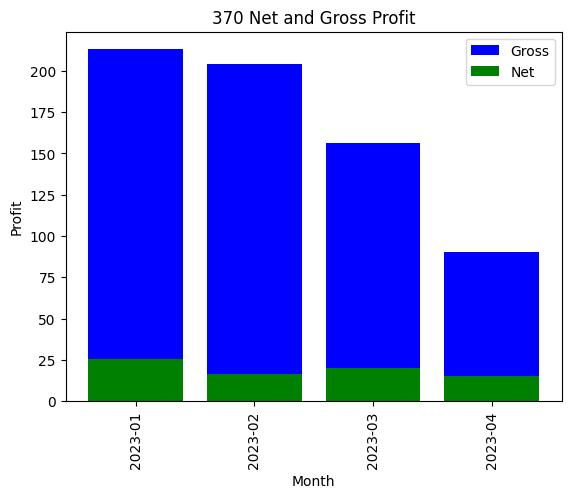

In [400]:
# x-coordinates of left sides of bars 
left = dfg0['Date']
  
# heights of bars
Gross = dfg0['Gross']
Net = dfg0['Net']
  
# labels for bars
tick_label = dfg0['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('370 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/370_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 372 Import and Clean 

In [401]:
by_cust =(df1['Customer']).value_counts().sort_index()
df1_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df1_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df1_customer = df1_customer.reset_index(drop=True)
df1_customer
df1_customer.to_csv(r'output/customer_visits/372_customers.csv', index=False)

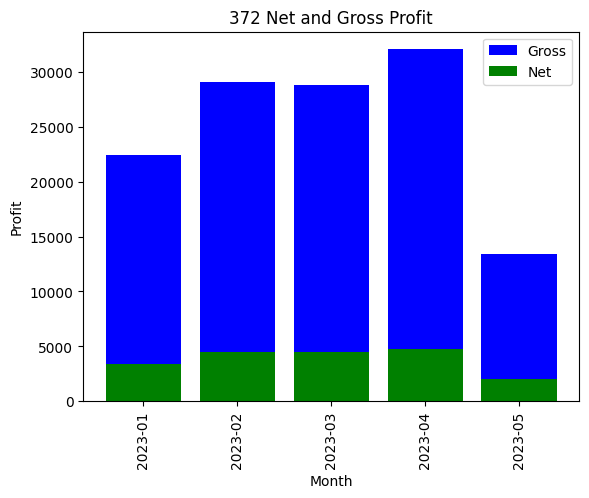

In [402]:
# x-coordinates of left sides of bars 
left = dfg1['Date']
  
# heights of bars
Gross = dfg1['Gross']
Net = dfg1['Net']
  
# labels for bars
tick_label = dfg1['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('372 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/372_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 373 Import and Clean 

In [403]:
by_cust =(df2['Customer']).value_counts().sort_index()
df2_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df2_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df2_customer = df2_customer.reset_index(drop=True)
df2_customer
df2_customer.to_csv(r'output/customer_visits/373_customers.csv', index=False)

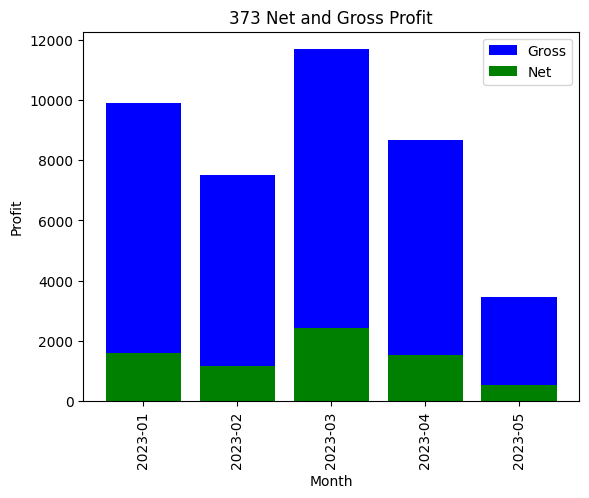

In [404]:
# x-coordinates of left sides of bars 
left = dfg2['Date']
  
# heights of bars
Gross = dfg2['Gross']
Net = dfg2['Net']
  
# labels for bars
tick_label = dfg2['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('373 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/373_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 374 Import and Clean 

In [405]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer = df3_customer.reset_index(drop=True)
df3_customer
df3_customer.to_csv(r'output/customer_visits/374_customers.csv', index=False)

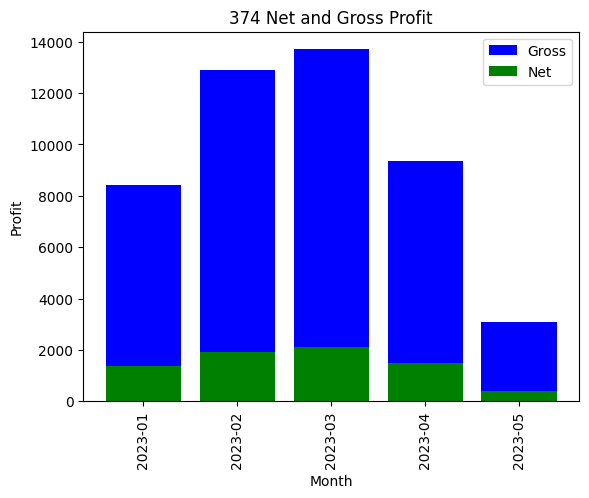

In [406]:
# x-coordinates of left sides of bars 
left = dfg3['Date']
  
# heights of bars
Gross = dfg3['Gross']
Net = dfg3['Net']
  
# labels for bars
tick_label = dfg3['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('374 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/374_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

Store 375 Import and Clean 

In [407]:
by_cust =(df4['Customer']).value_counts().sort_index()
df4_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df4_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df4_customer = df4_customer.reset_index(drop=True)
df4_customer
df4_customer.to_csv(r'output/customer_visits/375_customers.csv', index=False)


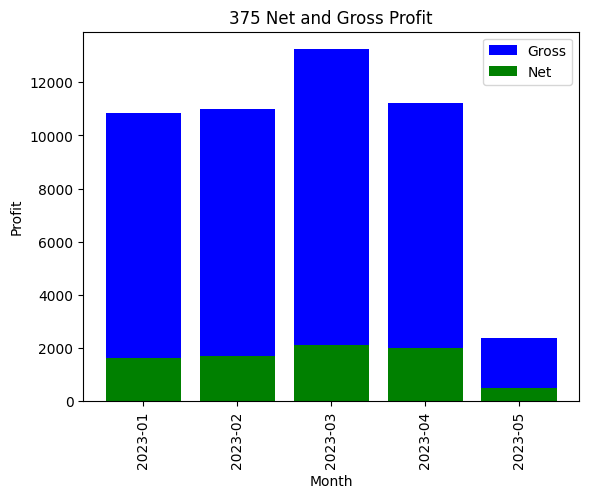

In [408]:
# x-coordinates of left sides of bars 
left = dfg4['Date']
  
# heights of bars
Gross = dfg4['Gross']
Net = dfg4['Net']
  
# labels for bars
tick_label = dfg4['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('375 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/375_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

In [409]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer = df5_customer.reset_index(drop=True)
df5_customer.head(20)
df5_customer.to_csv(r'output/customer_visits/376_customers.csv', index=False)

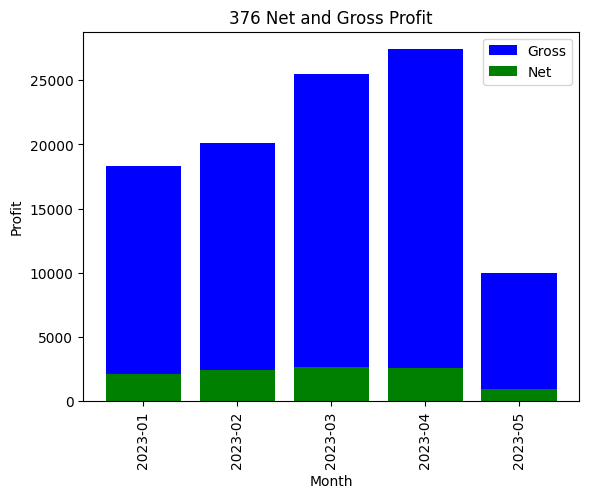

In [410]:
# x-coordinates of left sides of bars 
left = dfg5['Date']
  
# heights of bars
Gross = dfg5['Gross']
Net = dfg5['Net']
  
# labels for bars
tick_label = dfg5['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('376 Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/376_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()

The below cells combine all the stores together graphs the gross & net profit.

In [411]:
frames = [df0, df1, df2, df3, df4, df5]
df99 = pd.concat(frames)

In [412]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

# print(df99['Net'].sum())
# print(df99['Gross'].sum())


Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

data = Net_Gross
names = list(data.keys())
values = list(data.values())

# print('Total Gross:',(Total_Gross))
# print('Total Net:',(Total_net))

In [413]:
df99['Date'] = pd.to_datetime(df99['Date'])
df99['Date'] = df99['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df99 = df99.groupby(df99['Date']).aggregate(agg_functions)

# print(df99)

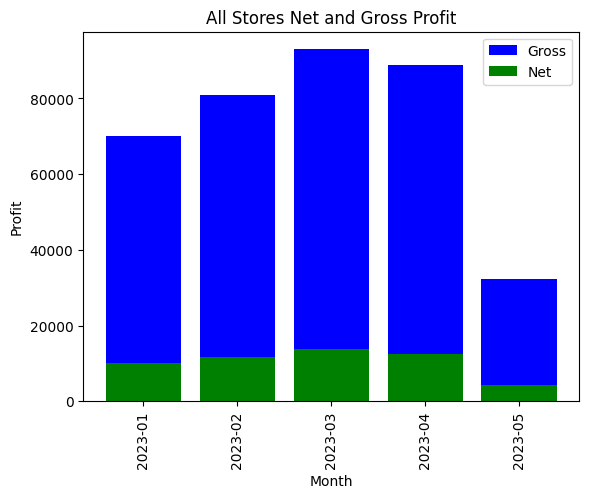

In [414]:
# x-coordinates of left sides of bars 
left = df99['Date']
  
# heights of bars
Gross = df99['Gross']
Net = df99['Net']
  
# labels for bars
tick_label = df99['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['blue'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Net and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.savefig('output/all_stores_gnp.jpg', dpi=100, bbox_inches = 'tight')
# plt.show()


End of code
below is code being worked on. 
This determines the top customers and displays the qty of the part they purchased.

In [415]:
# df0_customer = df0
# df0_customer = top_customers(df0)
# print(df0_customer)
# df0_customer.to_csv(r'output/customer_by_qty/370_customers_qty.csv', index=False)
# # df0_customer.plot.bar()

# df1_customer = df1
# df1_customer = top_customers(df1)
# # print(df1_customer)

# df2_customer = df2
# df2_customer = top_customers(df2)
# # df2_customer 

# df3_customer = df3
# df3_customer = top_customers(df3)
# # df3_customer

# df4_customer = df4
# df4_customer = top_customers(df4)
# # df4_customer

# df5_customer = df5
# df5_customer = top_customers(df5)
# # df5_customer